___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

Data vocabulary:

1. #3 (age): age in years 
2. #4 (sex): sex (1 = male; 0 = female) 
3. #9 (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. #10 (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. #12 (chol): serum cholestoral in mg/dl 
6. #16 (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. #19 (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): maximum heart rate achieved 
9. #38 (exang): exercise induced angina (1 = yes; 0 = no) 
10. #40 (oldpeak): ST depression induced by exercise relative to rest 
11. #41 (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. #44 (ca): number of major vessels (0-3) colored by flourosopy 
13. #51 (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. #58 (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 


* https://archive.ics.uci.edu/ml/datasets/heart+disease

# Import esential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

# Ingest the data to notebook

In [4]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There is no null value and all columns are int of float type.

# EDA

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
cp,303.000,0.967,1.032,0.000,0.000,1.000,2.000,3.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
restecg,303.000,0.528,0.526,0.000,0.000,1.000,1.000,2.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200


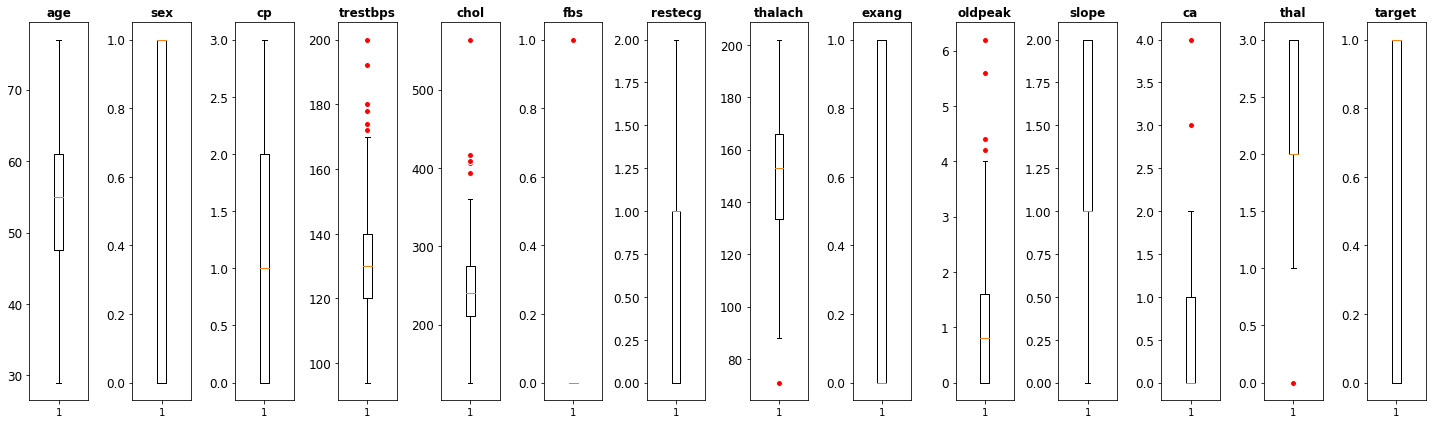

In [24]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,6))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)
    
plt.tight_layout()

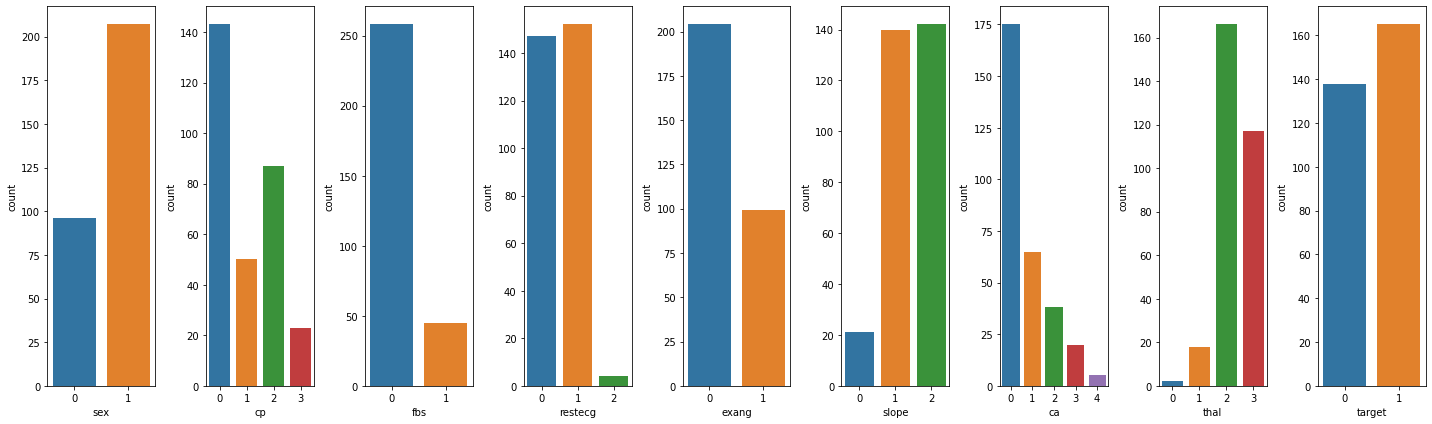

In [96]:
cat_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca","thal","target"]
num_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

fig, axs = plt.subplots(1, len(cat_columns), figsize=(20,6))
ax = axs.flatten()
for i in range(len(cat_columns)):
    sns.countplot(df[cat_columns[i]], ax=ax[i])
    
plt.tight_layout()

* Target values is not imbalanced.
* The values ca=4 and thal=0 can be anomaly. They will be controlled. 
* Another dataframe df1 will created to see effect of outliers.

In [26]:
df[df['trestbps']>170].sort_values(by='trestbps')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.500,2,0,3,1
241,59,0,0,174,249,0,1,143,1,0.000,1,0,2,0
101,59,1,3,178,270,0,0,145,0,4.200,0,0,3,1
260,66,0,0,178,228,1,1,165,1,1.000,1,2,3,0
110,64,0,0,180,325,0,1,154,1,0.000,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.600,1,0,3,0
266,55,0,0,180,327,0,2,117,1,3.400,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.000,2,1,3,0
223,56,0,0,200,288,1,0,133,1,4.000,0,2,3,0


resting blood pressure can be over 200. 

In [27]:
df[df['chol']>370]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.800,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.600,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.200,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.000,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.900,1,2,3,0


serum cholestoral in mg/dl can be over 400 mg/dl

In [29]:
df[df['thalach'] == 71]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.000,1,0,2,0


In [100]:
df1 = df[df['thalach'] != 71]

In [30]:
df[df['oldpeak'] > 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
101,59,1,3,178,270,0,0,145,0,4.200,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.200,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.600,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.200,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.400,0,3,1,0


In [101]:
df1 = df[df['oldpeak'] < 5]

In [32]:
df[df['ca'] > 3]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.000,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.400,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.000,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.100,1,4,3,0


In [102]:
df1 = df[df['ca'] < 4]

In [97]:
df[df['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.000,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.000,1,0,0,0


In [103]:
df1 = df[df['thal'] != 0]

In [105]:
df1.shape

(301, 14)

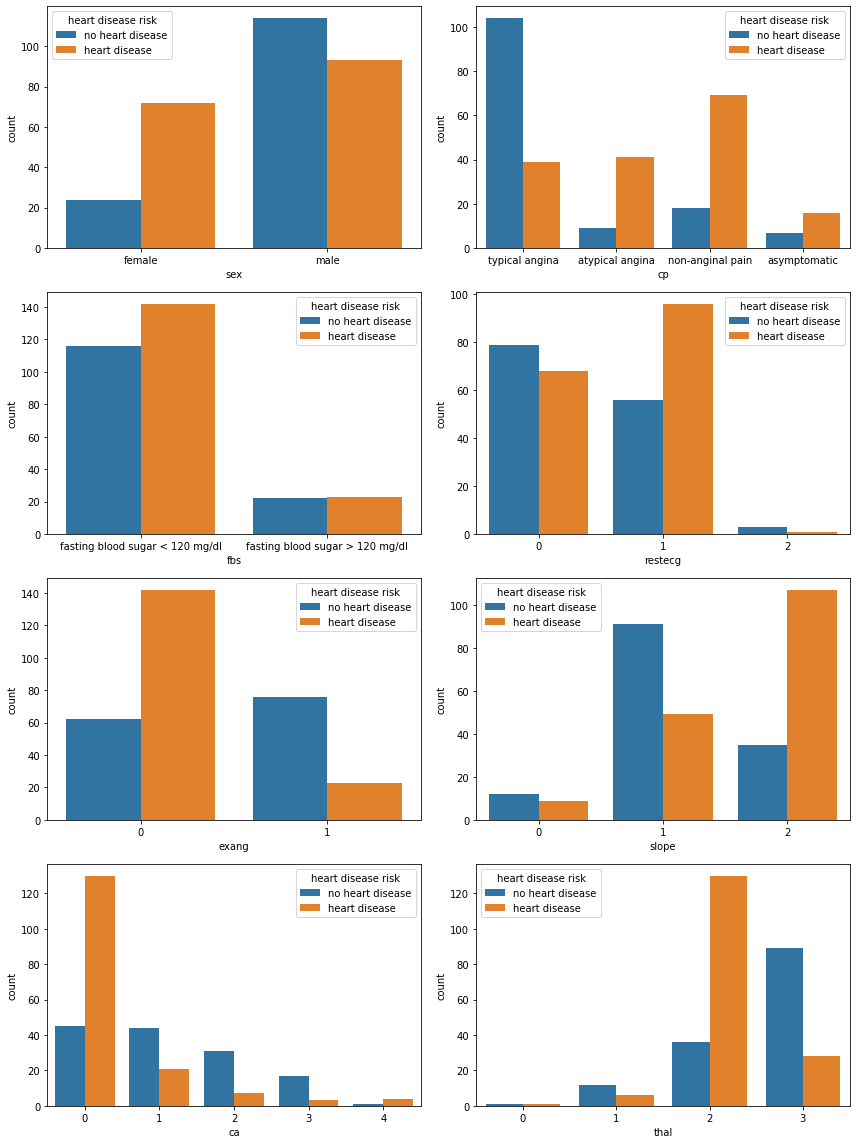

In [110]:
fig, axs = plt.subplots(4, 2, figsize=(12,16))
ax = axs.flatten()
for i in range(8):
    sns.countplot(df[cat_columns[i]], ax=ax[i], hue=df['target'])
    ax[i].legend(title='heart disease risk', labels=['no heart disease', 'heart disease'])


    
ax[0].set_xticklabels(labels=['female','male'])
ax[1].set_xticklabels(labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
ax[2].set_xticklabels(labels=['fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'])
    
    

plt.tight_layout()

* Heart disease rate of females greater than males.
* Heart disease rate of patient whose chest pain type is typical angina is lower than other patients.
* Fasting blood sugar has a little effect on heart disease.

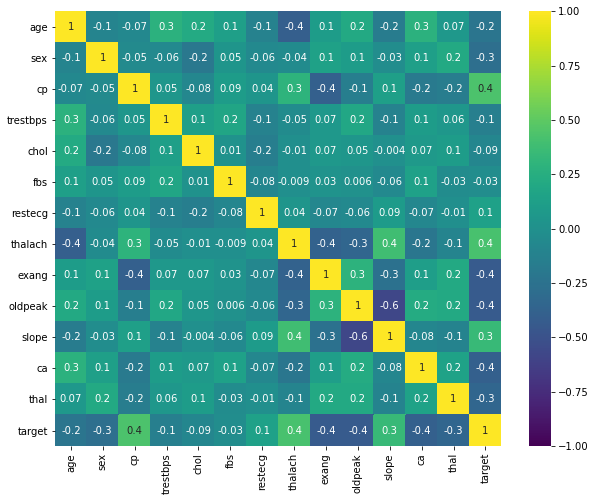

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),vmin = -1, annot=True, cmap='viridis', fmt='.1g')
plt.show()

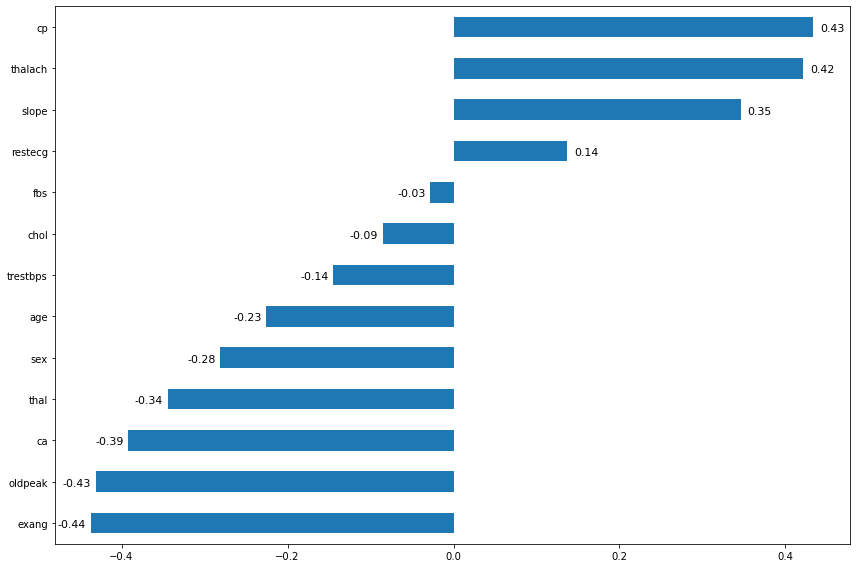

In [141]:
df_corr_target = df.corr()['target'].sort_values(ascending=True).drop('target')
plt.figure(figsize=(12,8))
ax = df_corr_target.plot.barh()
for i in ax.patches:
    if i.get_width()> 0:
        ax.text(i.get_width()+0.008, i.get_y()+0.15, \
            round(i.get_width(), 2), fontsize=11)
    else:
        ax.text(i.get_width()-0.04, i.get_y()+0.15, \
            round(i.get_width(), 2), fontsize=11)
plt.tight_layout()
plt.show()

The most important features are cp (+), thalach (+), slope (+), exang (-), oldpeak(-), ca (-), thal (-). 

In [95]:
data = df[num_columns].join(df['target'])

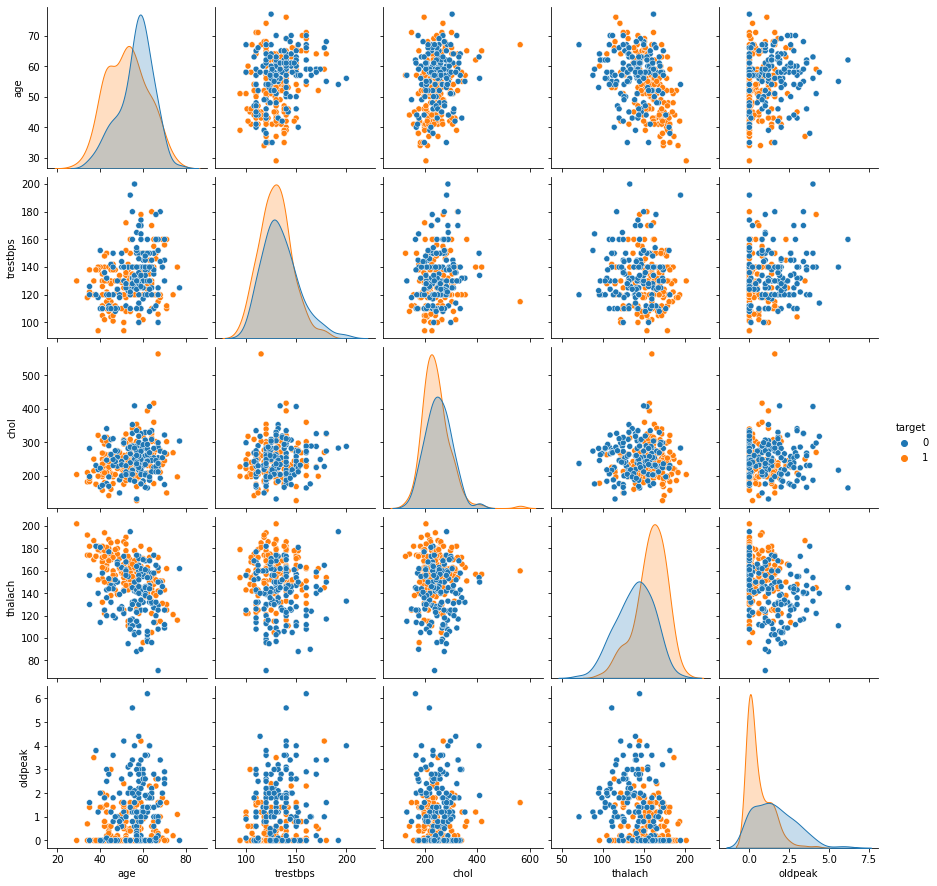

In [94]:
sns.pairplot(data=data, hue='target');

In the scatter plot of features, it is not seem a boundary line that separates the target values.  

# Data Preprocessing

In [166]:
X=df1.drop(["target"], axis=1)
y=df1["target"]

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [168]:
scaler = StandardScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [170]:
log_model=LogisticRegression()

In [171]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [172]:
y_pred=log_model.predict(X_test_scaled)

In [173]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [174]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print("--------------------------------------")
    print("Confusion_matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("classification_report")
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print("--------------------------------------")
    print("Confusion_matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print("classification_report")
    print(classification_report(y_train, y_train_pred))

In [220]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accurancy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

In [221]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[20  8]
 [ 2 31]]
classification_report
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.79      0.94      0.86        33

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 89  20]
 [ 11 120]]
classification_report
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       109
           1       0.86      0.92      0.89       131

    accuracy                           0.87       240
   macro avg       0.87      0.87      0.87       240
weighted avg       0.87      0.87      0.87       240



**Gridsearch**

In [222]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = "recall",   #f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1)

In [223]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [224]:
grid_model.best_params_

{'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

In [225]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
--------------------------------------
Confusion_matrix: 
[[19  9]
 [ 2 31]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        28
           1       0.78      0.94      0.85        33

    accuracy                           0.82        61
   macro avg       0.84      0.81      0.81        61
weighted avg       0.83      0.82      0.82        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 87  22]
 [ 10 121]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.80      0.84       109
           1       0.85      0.92      0.88       131

    accuracy                           0.87       240
   macro avg       0.87      0.86      0.86       240
weighted avg       0.87      0.87      0.87       240



In [226]:
lg = metric_df(grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'log_reg')
lg

,log_reg
False Negative Rate,0.033
False Positive Rate,0.148
True Negative Rate,0.311
True Positive Rate,0.508
accurancy,0.820
f1,0.849
precision,0.775
recall,0.939


# Implement KNN and Evaluate

In [181]:
test_error_rates = []

for k in range(1,30,2):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    
    test_error_rates.append(test_error)

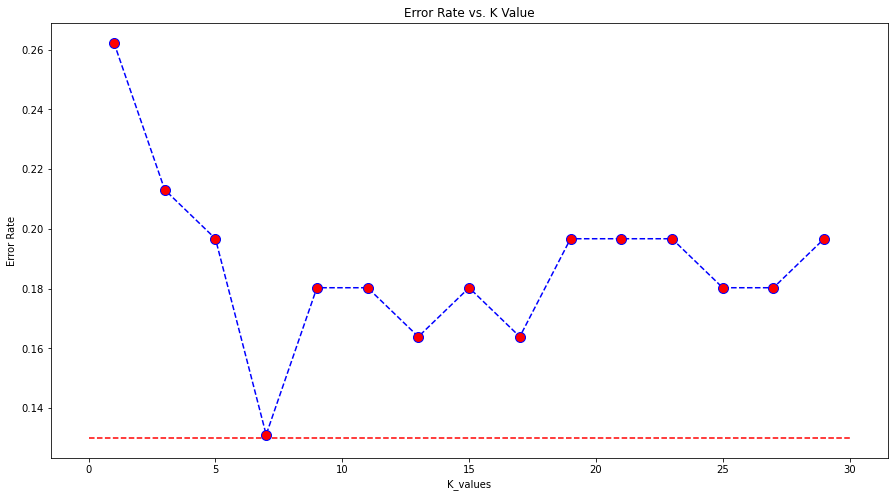

In [185]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30,2), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.13, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.show()

**It is seen that best K value is 7.**

In [186]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train_scaled,y_train)
print('WITH K=7\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=7

Test_Set
--------------------------------------
Confusion_matrix: 
[[22  6]
 [ 2 31]]
classification_report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.84      0.94      0.89        33

    accuracy                           0.87        61
   macro avg       0.88      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 89  20]
 [ 14 117]]
classification_report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       109
           1       0.85      0.89      0.87       131

    accuracy                           0.86       240
   macro avg       0.86      0.85      0.86       240
weighted avg       0.86      0.86      0.86       240



**Cross validate KNN K=7**

In [194]:
model = KNeighborsClassifier(n_neighbors=7)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.003,0.007,0.833,0.812,0.929,0.867
2,0.001,0.007,0.792,0.750,0.923,0.828
3,0.005,0.015,0.792,0.750,0.923,0.828
4,0.001,0.008,0.750,0.706,0.923,0.800
5,0.002,0.007,0.792,0.833,0.769,0.800
6,0.002,0.009,0.708,0.750,0.692,0.720
7,0.002,0.007,0.833,0.800,0.923,0.857
8,0.002,0.006,0.792,0.833,0.769,0.800
9,0.002,0.006,0.875,1.000,0.769,0.870
10,0.001,0.007,0.917,0.923,0.923,0.923


In [195]:
df_scores.mean()[2:]

test_accuracy    0.808
test_precision   0.816
test_recall      0.854
test_f1          0.829
dtype: float64

**KNN Grid Search**

In [187]:
knn_grid = KNeighborsClassifier()

In [188]:
k_values= range(1,30,2)

In [189]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [190]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [191]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 2), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [192]:
knn_grid_model.best_params_

{'n_neighbors': 29, 'p': 1, 'weights': 'uniform'}

**Grid search best k=29**

In [193]:
print('WITH K=29\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=29

Test_Set
--------------------------------------
Confusion_matrix: 
[[19  9]
 [ 3 30]]
classification_report
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


Train_Set
--------------------------------------
Confusion_matrix:
[[ 83  26]
 [  9 122]]
classification_report
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       109
           1       0.82      0.93      0.87       131

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.86      0.85      0.85       240



In [227]:
knn = metric_df(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test, 'knn_grid')
knn

,knn_grid
False Negative Rate,0.049
False Positive Rate,0.148
True Negative Rate,0.311
True Positive Rate,0.492
accurancy,0.803
f1,0.833
precision,0.769
recall,0.909


# Visually compare models based on your chosen metric

In [231]:
df_result = pd.concat([lg,knn], axis=1)
df_result

,log_reg,knn_grid
False Negative Rate,0.033,0.049
False Positive Rate,0.148,0.148
True Negative Rate,0.311,0.311
True Positive Rate,0.508,0.492
accurancy,0.820,0.803
f1,0.849,0.833
precision,0.775,0.769
recall,0.939,0.909


<AxesSubplot:>

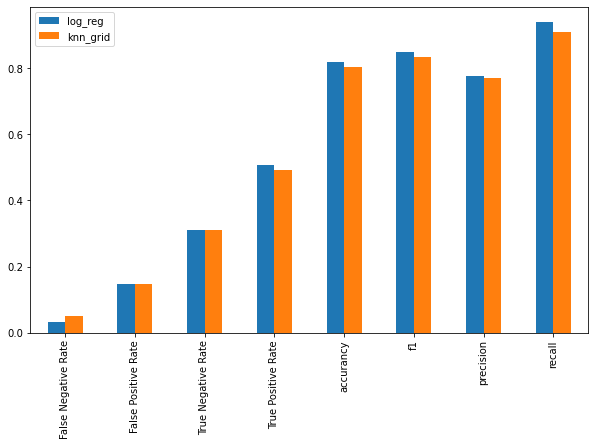

In [233]:
df_result.plot.bar()

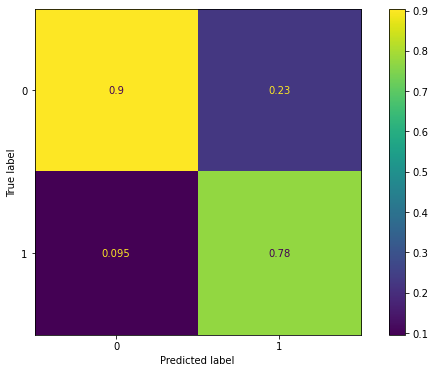

In [214]:
print('Log Regression Confusion Matrix')
plot_confusion_matrix(grid_model, X_test_scaled, y_test, normalize='pred');

KNN Confusion Matrix


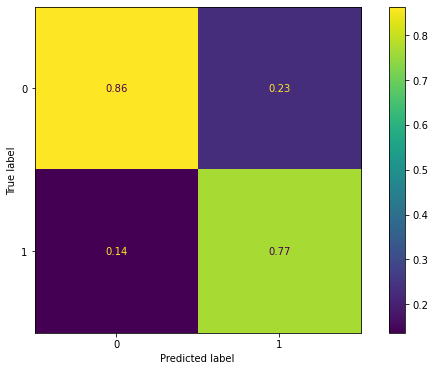

In [215]:
print('KNN Confusion Matrix')
plot_confusion_matrix(knn_grid_model, X_test_scaled, y_test, normalize='pred');

Log Regression ROC Curve


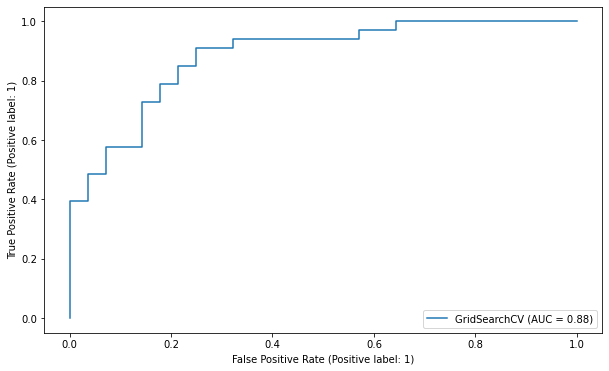

In [207]:
print('Log Regression ROC Curve')
plot_roc_curve(grid_model, X_test_scaled, y_test);

KNN ROC Curve


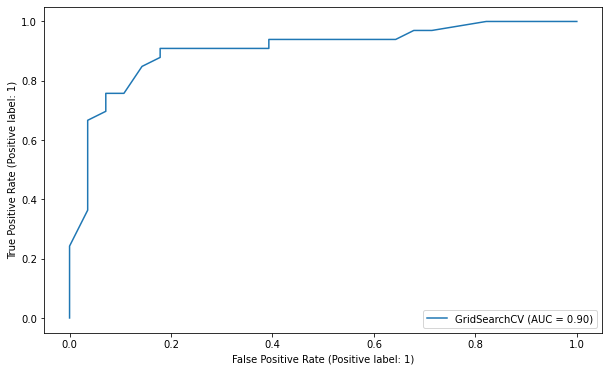

In [208]:
print('KNN ROC Curve')
plot_roc_curve(knn_grid_model, X_test_scaled, y_test);

# Chose best model and make a random prediction 

### log regression is best model. 

In [249]:
scaler = StandardScaler().fit(X)

In [250]:
import pickle
pickle.dump(scaler, open("scaler_heart_disease", 'wb'))

In [251]:
X_scaled = scaler.transform(X)

In [252]:
final_model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga').fit(X_scaled, y)

In [253]:
pickle.dump(final_model, open("final_heart_disease", 'wb'))

In [254]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [255]:
my_dict = {"age": [57, 33, 78],
           "sex": [0, 1, 1],
           "cp": [1, 2, 3],
           "trestbps": [140, 160, 180],
           "chol": [200, 250, 300],
           "fbs": [0, 0, 1],
           "restecg": [0, 1, 1],
           "thalach": [150, 170, 190],
           "exang": [0,0,1], 
            "oldpeak": [1,2,3], 
            "slope": [1,2,2], 
             "ca": [1,2,3], 
             "thal":[2,2,3]
          }

In [256]:
sample = pd.DataFrame(my_dict)
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,0,1,140,200,0,0,150,0,1,1,1,2
1,33,1,2,160,250,0,1,170,0,2,2,2,2
2,78,1,3,180,300,1,1,190,1,3,2,3,3


In [257]:
scaler_heart_disease = pickle.load(open("scaler_heart_disease", "rb"))

In [258]:
sample_scaled = scaler_heart_disease.transform(sample)
sample_scaled

array([[ 0.28818373, -1.47255596,  0.03223794,  0.47550683, -0.89726538,
        -0.41377074, -1.00588598,  0.01133928, -0.69480833, -0.03718574,
        -0.64735429,  0.25991567, -0.56379375],
       [-2.35039581,  0.67909134,  1.00260003,  1.61415088,  0.06743272,
        -0.41377074,  0.89833843,  0.88649889, -0.69480833,  0.82380725,
         0.97642605,  1.23784838, -0.56379375],
       [ 2.59694083,  0.67909134,  1.97296211,  2.75279493,  1.03213081,
         2.41679728,  0.89833843,  1.7616585 ,  1.43924583,  1.68480025,
         0.97642605,  2.2157811 ,  1.15036705]])

In [259]:
final_model = pickle.load(open("final_heart_disease", "rb"))

In [260]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [261]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred"] = predictions

In [262]:
sample

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_proba,pred
0,57,0,1,140,200,0,0,150,0,1,1,1,2,0.693,1
1,33,1,2,160,250,0,1,170,0,2,2,2,2,0.571,1
2,78,1,3,180,300,1,1,190,1,3,2,3,3,0.243,0
